# Resolution Parameters

First, mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername of the unzipped folder
FOLDERNAME = 'unet-master'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

# %cd drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# !bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/unet-master


Let's focus on image 8.png for these comparison resolution tests

Import the necessary functions

In [3]:
from model import *
from data import *

def saveResult(save_path,width,npyfile,flag_multi_class = False,num_class = 2):
    for i,item in enumerate(npyfile):
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        io.imsave(os.path.join(save_path,"{size}_predict.png".format(size = width)),img)

We'll now output several predicted maps of the original grain image, changing the dimension with each image

In [11]:
#Reminders
for i in [4,6,8,9,10,11,12,13,14,15,16,24,32]:
  print(f'{i} x 32 = {i*32}')

4 x 32 = 128
6 x 32 = 192
8 x 32 = 256
9 x 32 = 288
10 x 32 = 320
11 x 32 = 352
12 x 32 = 384
13 x 32 = 416
14 x 32 = 448
15 x 32 = 480
16 x 32 = 512
24 x 32 = 768
32 x 32 = 1024


In [13]:
widths = [] #Store various image sizes you want to test

for x in range (12,17):
  widths.append(32*x)
print("selected image output sizes:",widths)
#You need the image size to be a multiple of 2^5 = 32 because of the way/ number of times the layers pool

def generate_predictions(widths):
  for w in widths:
    #Define the generator to the correct size
    def testGenerator(test_path,num_image = 30,target_size = (w,w),flag_multi_class = False,as_gray = True):
      for i in range(num_image):
          img = io.imread(os.path.join(test_path,"%d.png"%i),as_gray = as_gray)
          img = img / 255
          img = trans.resize(img,target_size)
          img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
          img = np.reshape(img,(1,)+img.shape)
          yield img

    #Do the testing on each image
    testGene = testGenerator("data/resolution_test")
    model = unet(input_size=(w,w,1)) #
    model.load_weights("2000-3-weights.hdf5")
    results = 255 * model.predict_generator(testGene, 1, verbose=1)
    saveResult("data/resolution_test", str(w), results.astype('uint8'))

generate_predictions(widths)

selected image output sizes: [384, 416, 448, 480, 512]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1/1 [==============================] - 6s 6s/step


Let's now define some post processing functions

In [14]:
from skimage import data, io, filters, morphology
import numpy as np
import matplotlib.pyplot as plt

def imsubplot(ax, im, cmap="gray", title=None):
    ax.imshow(im, cmap=cmap)
    ax.axis("off")
    if title:
        ax.set_title(title)

def post_process(path, thresh=255, verbose=False):
    image = io.imread(path)
    threshold = np.zeros(image.shape)
    threshold[image < thresh] = 1
    skeleton = morphology.skeletonize(threshold)
    
    if verbose:
        fig, (a, b, c) = plt.subplots(ncols=3)
        
        imsubplot(a, image, title='UNET Output')
        imsubplot(b, threshold, title='Threshold')
        imsubplot(c, skeleton, title='Skeleton')
        plt.show()
    else:
        return skeleton

#post_process('data/test/0_predict.png', thresh=250, verbose=True)


Produce thresh skeletonized processed versions of all images

In [16]:
test_dir = 'data/resolution_test/'

for i in widths: 
    im_path = f'{test_dir}{i}_predict.png'
    skel = 255 * post_process(im_path, thresh=253)
    io.imsave(f'{test_dir}{i}_processed.png', skel.astype('uint8')) 

Display processed in a subplot (OBSOLETE CELL SKIP ME)

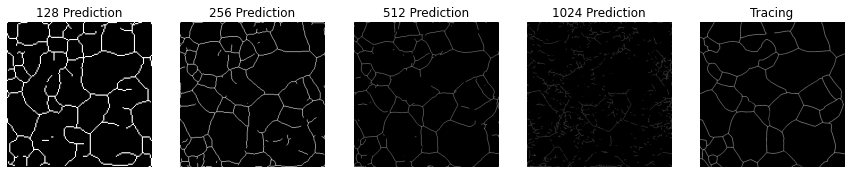

In [23]:
# Display

# Import modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read images

reservoir = [('data/resolution_test/128_processed.png','128 Prediction'),
             ('data/resolution_test/256_processed.png','256 Prediction'),
             ('data/resolution_test/512_processed.png','512 Prediction'),
             ('data/resolution_test/1024_processed.png','1024 Prediction'),
             ('data/resolution_test/Traced.png','Tracing')]

# Set your canvas (fig) and the number of axes (images) you want to display
#axs = (ax1,ax2,ax3,ax4,ax5)
fig, axs = plt.subplots(nrows=1,ncols=5,figsize=(15,10))

for n in range(0,5):
  path, title = reservoir[n]

  image = mpimg.imread(path)
  axs[n].imshow(image, cmap='gray')
  axs[n].set_title(title)
  axs[n].axis('off')

'''
img1 = mpimg.imread('data/resolution_test/128_processed.png')
img2 = mpimg.imread('data/resolution_test/256_processed.png')
img3 = mpimg.imread('data/resolution_test/512_processed.png')
img4 = mpimg.imread('data/resolution_test/1024_processed.png')
img5 = mpimg.imread('data/resolution_test/Traced.png')


ax1.imshow(img1, cmap='gray')
ax1.set_title("128")
ax1.axis('off')
ax2.imshow(img2, cmap='gray')
ax2.set_title("256")
ax2.axis('off')
ax3.imshow(img3, cmap='gray')
ax3.set_title("512")
ax3.axis('off')
ax4.imshow(img4, cmap='gray')
ax4.set_title("1024")
ax4.axis('off')
ax5.imshow(img5, cmap='gray')
ax5.set_title("Tracing")
ax5.axis('off')
'''

plt.show()


Overlayment: Generate images of the predict and trace maps overlayed on the originals

In [17]:
from PIL import Image
import numpy as np

def overlay(front_path,
            back_path,
            color):
  
  img = Image.open(front_path)
  background = Image.open(back_path)

  img = img.convert("RGBA")
  background = background.convert("RGBA")

  #Optional Color Exchange Step:
  pixdata = img.load()
  width, height = img.size
  for y in range(height):
      for x in range(width):
          if pixdata[x, y] == (255, 255, 255, 255): #FROM White
              if color == 'red':
                pixdata[x, y] = (255, 0, 0, 255) #TO Red
              if color == 'green':
                pixdata[x, y] = (0, 255, 0, 255) #TO Green
              if color == 'blue':
                pixdata[x, y] = (0, 0, 255, 255) #TO Blue

          #This step makes the black background transparent so you can see the original through it
          if pixdata[x, y] == (0, 0, 0, 255): #FROM Black
              pixdata[x, y] = (0, 0, 0, 0) #TO Transparency

  # Downsample the background to fit gen map
  size = img.size
  background = background.resize(size,Image.ANTIALIAS)
  background.paste(img, (0, 0), img)
  return background

# First put trace on orig in blue
front_path = 'data/resolution_test/Traced.png'
back_path = 'data/resolution_test/0.png'
traceover = np.array(overlay(front_path,back_path,'blue'))
io.imsave('data/resolution_test/traceover.png', traceover.astype('uint8'))

#This is where we will specify the images to cross compare
testers = widths

for i in testers:
  #PART I
  # Put predict on orig
  front_path = f'{test_dir}{i}_processed.png'
  back_path = 'data/resolution_test/0.png'
  over = np.array(overlay(front_path,back_path,'red'))
  io.imsave(f'{test_dir}{i}_predict_on_orig.png', over.astype('uint8'))

  #PART II
  # Put predict on traceover (= trace on orig)
  front_path = f'{test_dir}{i}_processed.png'
  back_path = 'data/resolution_test/traceover.png'
  over = np.array(overlay(front_path,back_path,'red'))
  io.imsave(f'{test_dir}{i}_both_on_orig.png', over.astype('uint8'))


Visualize the results

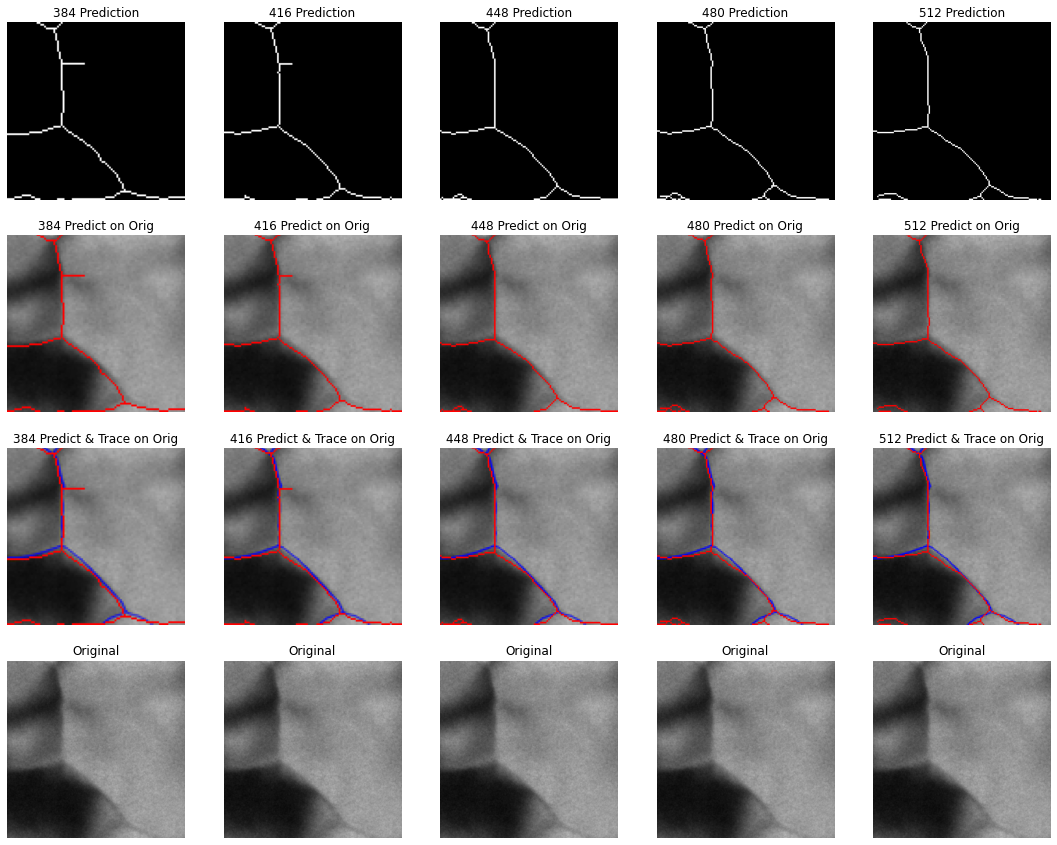

In [21]:
# Display

# Import modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read images

#Read the Resolutions to test from Testers list 
testers = widths

reservoir = [[],[],[],[]]
test_dir = 'data/resolution_test/'

for i in testers: 
    reservoir[0].append((f'{test_dir}{i}_processed.png',f'{i} Prediction'))
    reservoir[1].append((f'{test_dir}{i}_predict_on_orig.png',f'{i} Predict on Orig'))
    reservoir[2].append((f'{test_dir}{i}_both_on_orig.png',f'{i} Predict & Trace on Orig'))
    reservoir[3].append((f'{test_dir}0.png','Original'))

# Set your canvas (fig) and the number of axes (images) you want to display
fig, axs = plt.subplots(nrows=4,ncols=len(testers),figsize=(15*len(testers)/4,15))

for j in range(0,len(testers)):
  for i in range(0,4):
    path, title = reservoir[i][j]

    image = mpimg.imread(path)

    #This section lets you zoom in on a 1/16th of the image 
    # so you can better see what's going on
    size = image.shape[0]
    w = int(size/4)
    n = 3
    m = 2

    image = image[n*w:(n+1)*w,m*w:(m+1)*w]

    # n = 2, m = 3 gives a great comparison point full grain

    axs[i][j].imshow(image, cmap='gray')
    axs[i][j].set_title(title)
    axs[i][j].axis('off')


#plt.savefig('matrix.png', bbox_inches='tight')


In [22]:
reservoir

[[('data/resolution_test/384_processed.png', '384 Prediction'),
  ('data/resolution_test/416_processed.png', '416 Prediction'),
  ('data/resolution_test/448_processed.png', '448 Prediction'),
  ('data/resolution_test/480_processed.png', '480 Prediction'),
  ('data/resolution_test/512_processed.png', '512 Prediction')],
 [('data/resolution_test/384_predict_on_orig.png', '384 Predict on Orig'),
  ('data/resolution_test/416_predict_on_orig.png', '416 Predict on Orig'),
  ('data/resolution_test/448_predict_on_orig.png', '448 Predict on Orig'),
  ('data/resolution_test/480_predict_on_orig.png', '480 Predict on Orig'),
  ('data/resolution_test/512_predict_on_orig.png', '512 Predict on Orig')],
 [('data/resolution_test/384_both_on_orig.png', '384 Predict & Trace on Orig'),
  ('data/resolution_test/416_both_on_orig.png', '416 Predict & Trace on Orig'),
  ('data/resolution_test/448_both_on_orig.png', '448 Predict & Trace on Orig'),
  ('data/resolution_test/480_both_on_orig.png', '480 Predict & 

Adding Chi 2 values to the mix (unfinished)

In [33]:
from chi2test import *

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

img1 = mpimg.imread('data/resolution_test/256_processed.png')
img2 = mpimg.imread('data/resolution_test/Traced.png')

#Make both the same size
image_resized = resize(img2, (img1.shape[0],img1.shape[1]), anti_aliasing=True)

find_chi2(img1,img2)

0

In [ ]:
#Trash Can

'''
reservoir = [
              [('data/resolution_test/128_processed.png','128 Prediction'),
              ('data/resolution_test/256_processed.png','256 Prediction'),
              ('data/resolution_test/512_processed.png','512 Prediction'),
              ('data/resolution_test/1024_processed.png','1024 Prediction')],
             
              [('data/resolution_test/128_predict_on_orig.png','128 Predict on Orig'),
              ('data/resolution_test/256_predict_on_orig.png','256 Predict on Orig'),
              ('data/resolution_test/512_predict_on_orig.png','512 Predict on Orig'),
              ('data/resolution_test/1024_predict_on_orig.png','1024 Predict on Orig')],
             
              [('data/resolution_test/128_both_on_orig.png','128 Predict & Trace on Orig'),
              ('data/resolution_test/256_both_on_orig.png','256 Predict & Trace on Orig'),
              ('data/resolution_test/512_both_on_orig.png','512 Predict & Trace on Orig'),
              ('data/resolution_test/1024_both_on_orig.png','1024 Predict & Trace on Orig')],
             
              [('data/resolution_test/0.png','Original'),
               ('data/resolution_test/0.png','Original'),
               ('data/resolution_test/0.png','Original'),
               ('data/resolution_test/0.png','Original'),
              ]
             ]

'''
